In [87]:
## Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

#### Generate Random data
##### Y = 2 + 3 *x + random error
##### x - data randomly generated

In [3]:
## Generate Random data

np.random.seed(0)
x = np.random.rand(100,1)
y = 2 + 3*x + np.random.rand(100,1)

#### Linear Regression from Sklearn

Slope: [[2.93655106]]
Intercept: [2.55808002]
R-square: 0.9038655568672764
mean_square_error: 0.07623324582875007


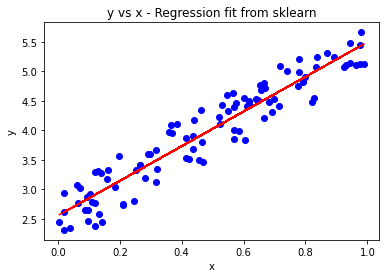

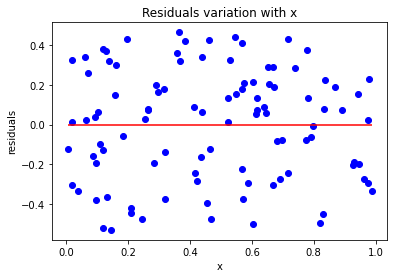

In [4]:
## Model building using Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_model = LinearRegression() # Model initialization
reg_model.fit(x,y) # Model fit
y_hat = reg_model.predict(x) # Prediction

# Model evaluation
r_2 = r2_score(y,y_hat)
mn_sqr_err = mean_squared_error(y,y_hat)

# Print Model coefficients
print('Slope:',reg_model.coef_)
print('Intercept:',reg_model.intercept_)
print('R-square:',r_2)
print('mean_square_error:',mn_sqr_err)

# plotting
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='blue')
plt.plot(x,y_hat,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Regression fit from sklearn')
plt.show()

# Residual plot
resid = y-y_hat
plt.figure(figsize=(6,4))
plt.scatter(x,resid,color='blue')
plt.hlines(y=0,xmin = min(x)[0], xmax = max(x)[0],colors='r')
plt.xlabel('x')
plt.ylabel('residuals')
plt.title('Residuals variation with x')
plt.show()

####  Linear Regression through OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     921.4
Date:                Wed, 13 Oct 2021   Prob (F-statistic):           1.22e-51
Time:                        14:36:52   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5581      0.054     47.751      0.0

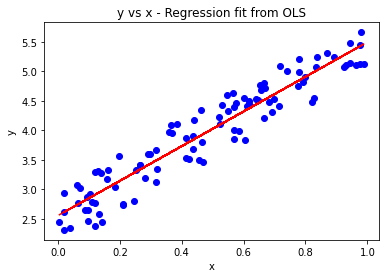

R2 square value: 0.9038655568672764


In [5]:
import statsmodels.api as sm

# add constant
x_OLS = sm.add_constant(x)
OLS = sm.OLS(y,x_OLS)
OLS_mdl = OLS.fit()
print(OLS_mdl.summary())

OLS_pred = OLS_mdl.predict(x_OLS)

OLS_resid = np.concatenate(y,axis=0)-OLS_pred

# plotting
plt.figure(figsize=(6,4))
plt.scatter(x,y,color='blue')
plt.plot(x,OLS_pred,c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Regression fit from OLS')
plt.show()

# R_square value
r_2 = r2_score(y,OLS_pred)
print('R2 square value:',r_2)

#### Closed Form solution
##### $\theta$ = Inverse($X^{T}$$X$).($X^{T}$$Y$)

theta_0: 2.5580800241570163
theta_1: 2.936551060203776
Actual theta_0: 2
Actual theta_1: 3


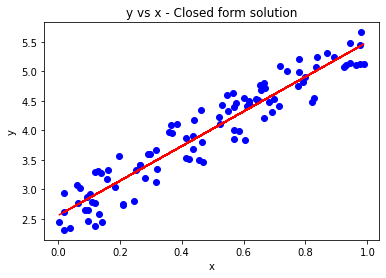

R2 square value: 0.9038655568672764


In [6]:
x_with_const = np.c_[np.ones((100,1)),x]
theta_clsd_form = np.dot(np.linalg.inv(np.dot(x_with_const.transpose(),x_with_const)),np.dot(x_with_const.transpose(),y))
print('theta_0:',theta_clsd_form[0][0])
print('theta_1:',theta_clsd_form[1][0])

print('Actual theta_0:',2)
print('Actual theta_1:',3)

y_pred = np.dot(x_with_const,theta_clsd_form)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Closed form solution')
plt.show()

# R_square value
r_2 = r2_score(y,y_pred)
print('R2 square value:',r_2)

#### Batch Gradient Descent Method

Hypothesis: H_theta = transpose(theta).x

Gradient: transpose(x).(H_theta-y)

theta: theta = theta - (alpha/m) * Gradient

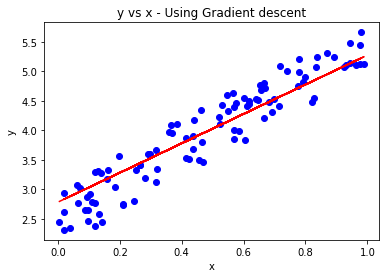

r_2 score: 0.8825097793567056


In [7]:
theta = np.random.rand(2,1)
n_iter = 1000
alpha = 0.01
tol = 1e-6

def gradient_des(x,y,theta,alpha,n_iter,tol):
    cost_func_hist = np.zeros((n_iter))
    theta_hist = np.zeros((n_iter,2))
    for iter in range(n_iter):
        H_theta = x_with_const.dot(theta)
        gradient = np.dot(x.T,(H_theta-y))
        update = (alpha/len(x))*gradient
        
        if np.all(np.abs(update) <= tol):
            print('Reached tolerance value')
            break
            
        theta = theta - update
        cost_func_hist[iter] = np.dot((H_theta-y).T,H_theta-y)[0][0]
        theta_hist[iter] = theta.reshape(1,2)
    return(theta,theta_hist,cost_func_hist)

theta_GD,theta_hist,cost_func_hist = gradient_des(x_with_const,y,theta,alpha,n_iter,tol)

y_pred_GD = np.dot(x_with_const,theta_GD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_GD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Using Gradient descent')
plt.show()

print('r_2 score:',r2_score(y,y_pred_GD))

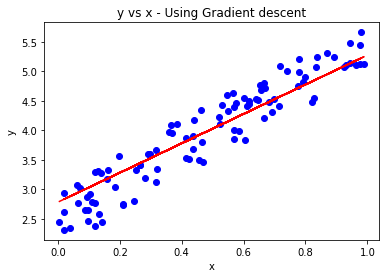

In [8]:
plt.figure(figsize=(6,4))
plt.plot(x,y_pred_GD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Using Gradient descent')
plt.show()

##### Above r-square is less than r-square from OLS
##### Need to Tune the learning parameter

#### Tuning learning parameter (alpha) parameter

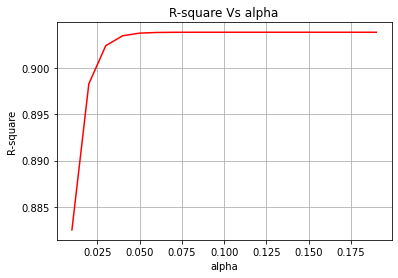

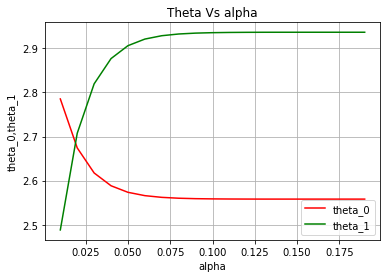

In [9]:
alpha_lst = list(np.arange(0.01,0.2,0.01))
theta_0_lr_var = {}
theta_1_lr_var = {}
cost_func_lr_var = {}
y_pred_lr_var = {}
r_2_lr_var = {}

for alpha_val in alpha_lst:

    temp_theta_val, temp_theta_hist, temp_cost_func_hist = gradient_des(x_with_const,y,theta,alpha_val,n_iter,tol)
    
    y_pred_lr_var[alpha_val] = np.dot(x_with_const,temp_theta_val)
   
    theta_0_lr_var[alpha_val] = temp_theta_val[0][0]
    theta_1_lr_var[alpha_val] = temp_theta_val[1][0]
    
    cost_func_lr_var[alpha_val] = temp_cost_func_hist
    
    r_2_lr_var[alpha_val] = r2_score(y,y_pred_lr_var[alpha_val] )

# Plotting R-square with learning parameter
plt.figure(figsize=(6,4))
sns.lineplot(x=list(r_2_lr_var.keys()),y=list(r_2_lr_var.values()),color='r')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('R-square')
plt.title('R-square Vs alpha')
plt.show()

# Plotting Coefficients with learning parameter
plt.figure(figsize=(6,4))
sns.lineplot(x=list(theta_0_lr_var.keys()),y=list(theta_0_lr_var.values()),color='r')
sns.lineplot(x=list(theta_1_lr_var.keys()),y=list(theta_1_lr_var.values()),color='g')
plt.grid()
plt.xlabel('alpha')
plt.ylabel('theta_0,theta_1')
plt.title('Theta Vs alpha')
plt.legend(['theta_0','theta_1'])
plt.show()

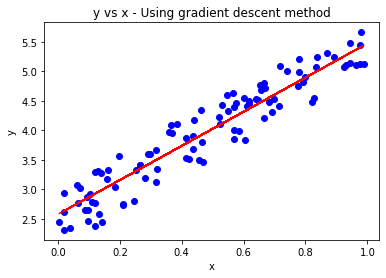

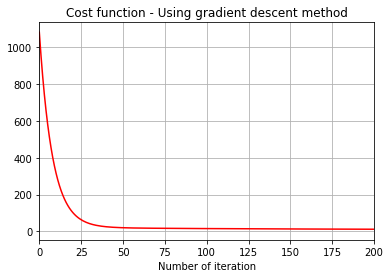

r_2 score: 0.9036490489088853


In [113]:
## Finalized Gradient descent model
theta = np.random.rand(2,1)
n_iter = 1000
alpha = 0.05

start_time_GD = time.time()
theta_GD,theta_hist,cost_func_hist = gradient_des(x_with_const,y,theta,alpha,n_iter,tol)
end_time_GD = time.time()

y_pred_GD = np.dot(x_with_const,theta_GD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_GD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Using gradient descent method')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(np.arange(n_iter)),cost_func_hist,'r-')
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('')
plt.title('Cost function - Using gradient descent method')
plt.xlim(0,200)
plt.show()

print('r_2 score:',r2_score(y,y_pred_GD))

#### Mini-Batch Gradient descent

In [114]:
def mini_batch_gradient_des(x,y,theta,alpha,n_iter,tol,rand_sampl_size):
    cost_func_hist = np.zeros((n_iter))
    theta_hist = np.zeros((n_iter,2))
        
    for iter in range(n_iter):
        
        rand_array = [np.random.choice(x.shape[0], rand_sampl_size, replace=True)]
        x_sample = np.take(x,[rand_array],axis=0)[0][0]
        y_sample = np.take(y,[rand_array],axis=0)[0][0]
        
        H_theta = x_sample.dot(theta)
        gradient = np.dot(x_sample.T,(H_theta-y_sample))
        update = (alpha/len(x_sample))*gradient
        
        if np.all(np.abs(update) <= tol):
            print('Reached tolerance value')
            break
            
        theta = theta - update
        cost_func_hist[iter] = np.dot((H_theta-y_sample).T,H_theta-y_sample)[0][0]
        theta_hist[iter] = theta.reshape(1,2)
        
    return(theta,theta_hist,cost_func_hist)

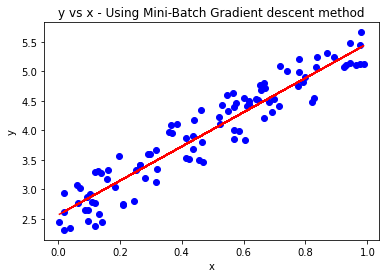

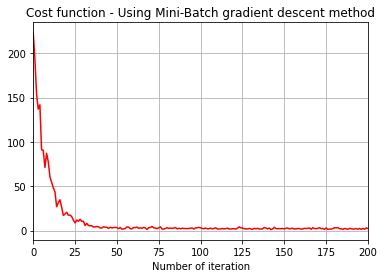

r_2 score: 0.9036266177326061


In [118]:
## Finalized model with Mini-batch gradient descent
theta = np.random.rand(2,1)
n_iter = 1000
alpha = 0.05
rand_sampl_size = int(0.2*len(x_with_const))

start_time_MBGD = time.time()
theta_SGD,theta_hist,cost_func_hist = mini_batch_gradient_des(x_with_const,y,theta,alpha,n_iter,tol,rand_sampl_size)
end_time_MBGD = time.time()

y_pred_SGD = np.dot(x_with_const,theta_SGD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_SGD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Using Mini-Batch Gradient descent method')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(np.arange(n_iter)),cost_func_hist,'r-')
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('')
plt.title('Cost function - Using Mini-Batch gradient descent method')
plt.xlim(0,200)
plt.show()

print('r_2 score:',r2_score(y,y_pred_SGD))

#### Stochastic Batch gradient

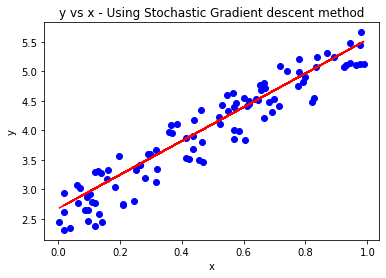

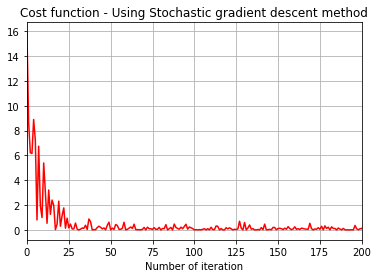

r_2 score: 0.8948982627740473


In [119]:
## Finalized model with stochastic gradient descent
theta = np.random.rand(2,1)
n_iter = 1000
alpha = 0.05
rand_sampl_size = 1

start_time_SGD = time.time()
theta_SGD,theta_hist,cost_func_hist = mini_batch_gradient_des(x_with_const,y,theta,alpha,n_iter,tol,rand_sampl_size)
end_time_SGD = time.time()

y_pred_SGD = np.dot(x_with_const,theta_SGD)

plt.figure(figsize=(6,4))
plt.plot(x,y_pred_SGD,'r-')
plt.scatter(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y vs x - Using Stochastic Gradient descent method')
plt.show()

plt.figure(figsize=(6,4))
plt.plot(list(np.arange(n_iter)),cost_func_hist,'r-')
plt.grid()
plt.xlabel('Number of iteration')
plt.ylabel('')
plt.title('Cost function - Using Stochastic gradient descent method')
plt.xlim(0,200)
plt.show()

print('r_2 score:',r2_score(y,y_pred_SGD))

#### Time Comparison acorss the gradient descent Methods

In [120]:
print('Time taken for Gradient descent:',end_time_GD-start_time_GD)

print('Time taken for Stochastic Gradient descent:',end_time_SGD-start_time_SGD)

print('Time taken for Mini-Batch Gradient descent:',end_time_MBGD-start_time_MBGD)

Time taken for Gradient descent: 0.062044620513916016
Time taken for Stochastic Gradient descent: 0.16102004051208496
Time taken for Mini-Batch Gradient descent: 0.15659737586975098
